# Spaceship Titanic

library installation

In [1]:
! pip install numpy pandas matplotlib seaborn scikit-learn streamlit;


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Taking training data for analysis

In [3]:
data = pd.read_csv("../Data/train.csv")

In [4]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

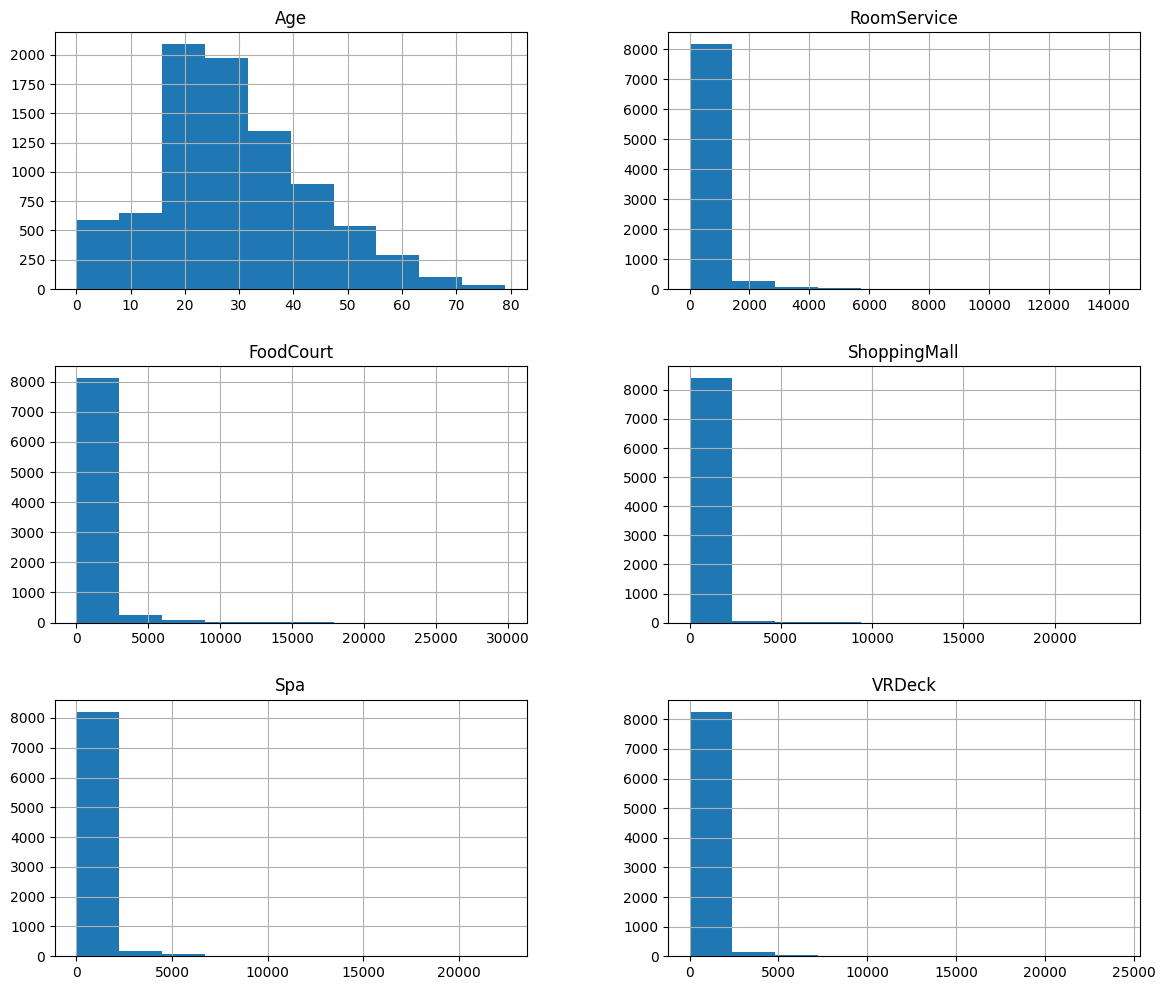

In [6]:
data.hist(figsize=(14,12))

In [7]:
data["HomePlanet"].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [8]:
data["Destination"].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [9]:
data["Name"].value_counts()

Name
Gollux Reedall        2
Elaney Webstephrey    2
Grake Porki           2
Sus Coolez            2
Apix Wala             2
                     ..
Jamela Griffy         1
Hardy Griffy          1
Salley Mckinn         1
Mall Frasp            1
Propsh Hontichre      1
Name: count, Length: 8473, dtype: int64

In [10]:
data["VIP"].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [11]:
data['CryoSleep'].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [12]:
data["RoomService"].value_counts()

RoomService
0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: count, Length: 1273, dtype: int64

In [13]:
# by studying data documentation some points are found to be useless
# RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
# name

## Data prepration

In [14]:
y_train = data["Transported"]
X_train = data.drop(["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Name", "Transported","Cabin"], axis=1)

In [15]:
X_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False


In [16]:
X_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP'], dtype='object')

In [17]:
def data_split(data):
    X = data.drop(["PassengerId","RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Name","Transported"], axis=1)
    y = data["Transported"]
    return X, y

In [18]:
len(X_train)

8693

In [19]:
X_train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False
...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False
8691,9280_01,Europa,False,55 Cancri e,32.0,False


## Data Cleaning

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# here we arre making two pipelines one for object type data and one for float type data  

cat_attribs = ['HomePlanet', 'CryoSleep', 'Destination','VIP']
num_attribs = ["Age"]
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy= "most_frequent")),
    ("Encoder", OneHotEncoder()),
])

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

combined_pipeline = ColumnTransformer([
    ("cat", cat_pipeline, cat_attribs),
    ("num", num_pipeline, num_attribs),
])

bool_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

In [21]:
X_trans = combined_pipeline.fit_transform(X_train)

In [22]:
y_trans = bool_pipeline.fit_transform(np.array(y_train.astype(float)).reshape(-1,1))

In [23]:
small_data = X_trans[:2]

In [24]:
pd.DataFrame(y_trans)

,0
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0
...,...
8688,0.0
8689,0.0
8690,1.0
8691,0.0


## Machine learning Model Testing

### 1. SGD Classifier

In [25]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()

sgd_clf.fit(X_trans,y_trans)

d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier()

### 2. SVM Classifier

In [26]:
from sklearn.svm import SVC
svm_clf = SVC()

svm_clf.fit(X_trans,y_trans)

d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [27]:
svm_clf.predict(small_data)

array([0., 0.])

### 3. Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

tree_clf.fit(X_trans,y_trans)

DecisionTreeClassifier()

In [29]:
tree_clf.predict(small_data)

array([0., 0.])

## Model Selection

### 1. SGD Evaluation

In [30]:
from sklearn.model_selection import cross_val_predict, cross_val_score

y_predict = cross_val_predict(sgd_clf, X_trans,y_trans, cv=3)

d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
from sklearn.metrics import confusion_matrix
cf_sgd = confusion_matrix(y_predict, y_trans)
cf_sgd

array([[ 421,  302],
       [3894, 4076]], dtype=int64)

<Axes: >

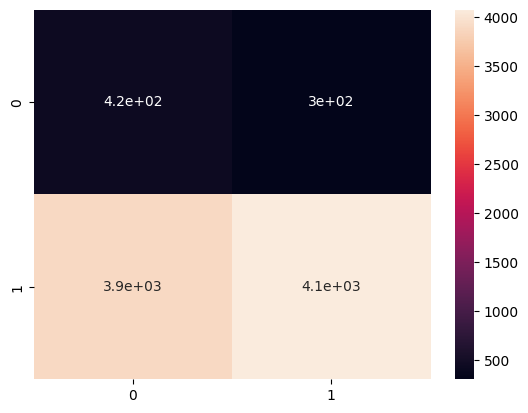

In [32]:
sns.heatmap(cf_sgd, annot=True)

In [33]:
from sklearn.metrics import precision_score,recall_score,f1_score

precision_score(y_trans, y_predict)

0.511417816813049

In [34]:
recall_score(y_trans, y_predict)

0.9310187300137049

In [35]:
f1_score(y_trans, y_predict)

0.6601878846776806

Text(0, 0.5, 'True positive rate')

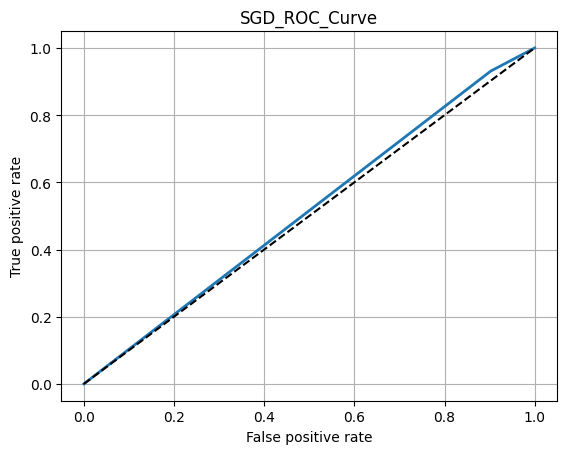

In [36]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr_sgd,tpr_sgd, threshold = roc_curve(y_trans,y_predict)

plt.plot(fpr_sgd,tpr_sgd, linewidth =2)
plt.plot([0,1],[0,1],"k--")
plt.grid()
plt.title("SGD_ROC_Curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

In [37]:
roc_auc_score(y_trans,y_predict)

0.5142926790277099

### 2. SVM Evaluation

In [38]:
y_pred_svm = cross_val_predict(svm_clf,X_trans,y_trans, cv=3)

d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
cf_svm = confusion_matrix(y_trans,y_pred_svm)
cf_svm

array([[3693,  622],
       [1704, 2674]], dtype=int64)

<Axes: >

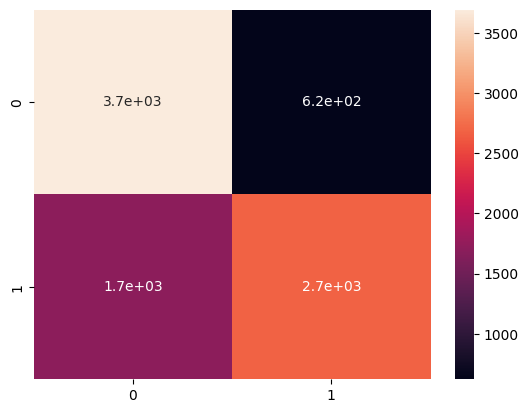

In [40]:
sns.heatmap(cf_svm, annot=True)

Text(0, 0.5, 'True positive rate')

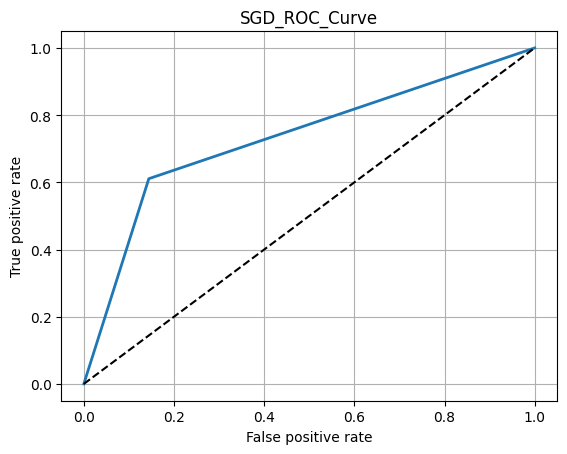

In [41]:
fpr_svm, tpr_svm, threshold_svm = roc_curve(y_trans,y_pred_svm)
plt.plot(fpr_svm,tpr_svm, linewidth =2)
plt.plot([0,1],[0,1],"k--")
plt.grid()
plt.title("SGD_ROC_Curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

In [42]:
f1_score(y_trans,y_pred_svm)

0.6968986187125359

In [43]:
roc_auc_score(y_trans,y_pred_svm)

0.7333164294028872

### 3. Decision Tree Evaluation

In [44]:
y_pred_tree = cross_val_predict(tree_clf, X_trans,y_trans, cv=3)

In [45]:
cf_tree = confusion_matrix(y_trans,y_pred_tree)
cf_tree

array([[3492,  823],
       [1697, 2681]], dtype=int64)

In [46]:
f1_score(y_trans,y_pred_tree)

0.680284191829485

<Axes: >

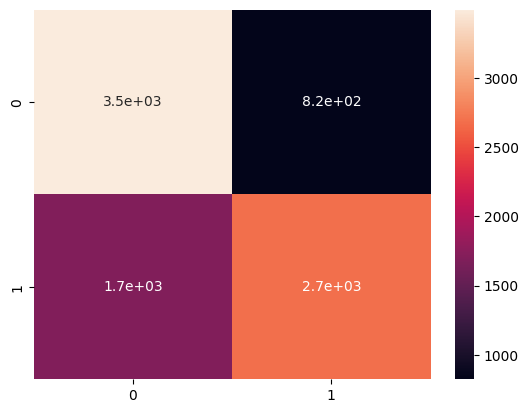

In [47]:
sns.heatmap(cf_tree, annot=True)

Text(0, 0.5, 'True positive rate')

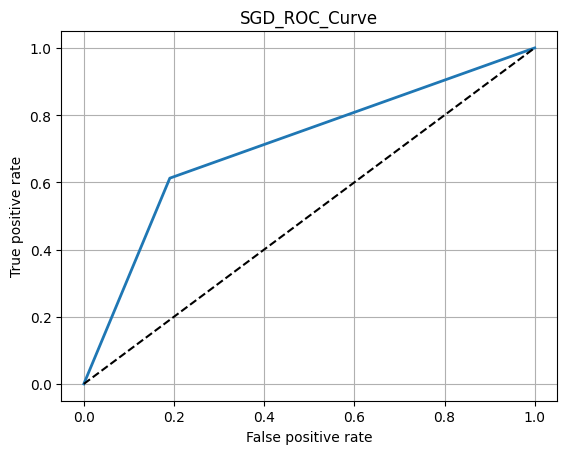

In [48]:
fpr_tree, tpr_tree, threshold_tree = roc_curve(y_trans,y_pred_tree)
plt.plot(fpr_tree,tpr_tree, linewidth =2)
plt.plot([0,1],[0,1],"k--")
plt.grid()
plt.title("SGD_ROC_Curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

In [49]:
roc_auc_score(y_trans,y_pred_tree)

0.7108250353209216

## Model Selection

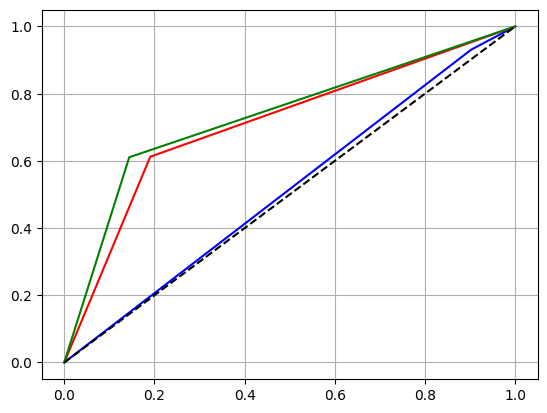

In [50]:
plt.plot(fpr_sgd,tpr_sgd, color="blue")
plt.plot(fpr_tree,tpr_tree, color="red")
plt.plot(fpr_svm,tpr_svm, color="green")
plt.plot([0,1],[0,1],"k--")
plt.grid()

#### Testing ensemble models

In [51]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[("sgd", sgd_clf), ("svm", svm_clf), ("tree", tree_clf)])

voting_clf.fit(X_trans, y_trans)

d:\Machine Learing\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Machine Learing\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('sgd', SGDClassifier()), ('svm', SVC()),
                             ('tree', DecisionTreeClassifier())])

In [52]:
voting_clf.predict(small_data)

array([0., 0.])

#### Ensembled classifier Evaluation

In [53]:
y_pred_ens = cross_val_predict(voting_clf, X_trans,y_trans, cv=3)

d:\Machine Learing\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Machine Learing\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
d:\Machine Learing\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Machine Learing\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

KeyboardInterrupt: 

In [ ]:
cf_ens = confusion_matrix(y_trans, y_pred_ens)
cf_ens

array([[3722,  593],
       [1765, 2613]], dtype=int64)

<Axes: >

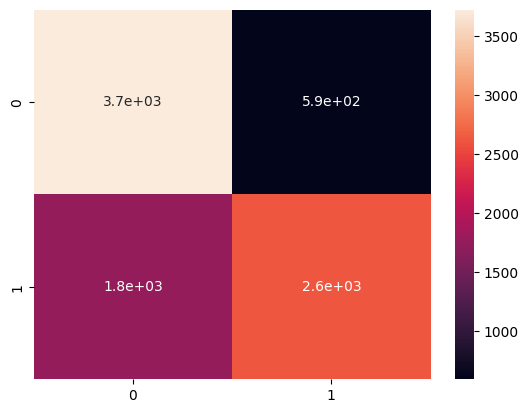

In [ ]:
sns.heatmap(cf_ens, annot=True)

Text(0, 0.5, 'True positive rate')

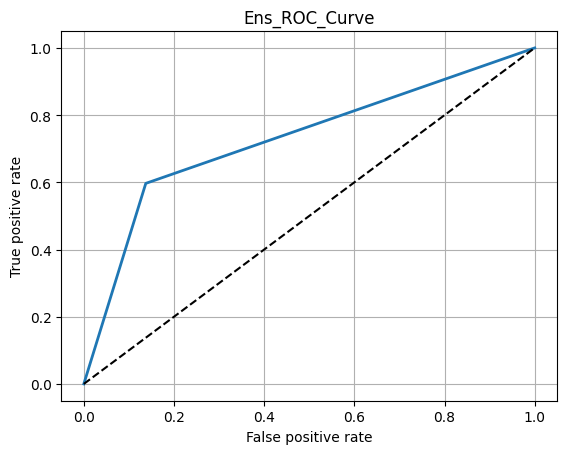

In [ ]:
fpr_ens, tpr_ens, threshold_ens = roc_curve(y_trans,y_pred_ens)
plt.plot(fpr_ens,tpr_ens, linewidth =2)
plt.plot([0,1],[0,1],"k--")
plt.grid()
plt.title("Ens_ROC_Curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

In [ ]:
roc_auc_score(y_trans,y_pred_ens)

0.7297101487634104

`We are going to use SVM for further fine tuning based on better auc scores`

## Fine tune the SVM Model

In [ ]:
from sklearn.model_selection import GridSearchCV
SVC()
Grid_params = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    "kernel":["rbf"],
}

grid = GridSearchCV(SVC(), Grid_params,refit=True, verbose=3, cv=3)

In [ ]:
grid.fit(X_trans,y_trans)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.714 total time=   4.4s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   4.8s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.713 total time=   4.2s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.726 total time=   3.1s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.719 total time=   2.9s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.748 total time=   2.9s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.703 total time=   3.2s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.704 total time=   3.2s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.737 total time=   3.2s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.569 total time=   3.4s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.550 total time=   3.3s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.582 total time=   3.5s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.517 total time=   3.4s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.555 total time=   3.5s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.534 total time=   3.4s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.714 total time=   2.7s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.703 total time=   2.6s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.733 total time=   2.7s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.732 total time=   3.0s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.728 total time=   3.0s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.751 total time=   3.2s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.726 total time=   3.0s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.725 total time=   3.0s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.750 total time=   3.2s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.723 total time=   3.5s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.725 total time=   3.1s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.749 total time=   3.3s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.601 total time=   4.4s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.584 total time=   3.7s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.608 total time=   3.7s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END .........C=10, gamma=1, kernel=rbf;, score=0.711 total time=   2.8s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .........C=10, gamma=1, kernel=rbf;, score=0.702 total time=   2.8s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .........C=10, gamma=1, kernel=rbf;, score=0.729 total time=   2.8s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.729 total time=   6.8s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.719 total time=   8.9s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.742 total time=  10.0s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ......C=10, gamma=0.01, kernel=rbf;, score=0.729 total time=  10.3s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ......C=10, gamma=0.01, kernel=rbf;, score=0.727 total time=   6.2s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ......C=10, gamma=0.01, kernel=rbf;, score=0.749 total time=   5.7s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.726 total time=   3.4s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.725 total time=   3.0s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.745 total time=   3.2s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.710 total time=   3.2s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.716 total time=   3.5s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.729 total time=   3.3s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ........C=100, gamma=1, kernel=rbf;, score=0.711 total time=   2.7s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ........C=100, gamma=1, kernel=rbf;, score=0.702 total time=   2.8s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ........C=100, gamma=1, kernel=rbf;, score=0.729 total time=   2.9s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.722 total time=  38.3s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.714 total time=  26.4s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.734 total time=  29.1s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END .....C=100, gamma=0.01, kernel=rbf;, score=0.731 total time=  32.2s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .....C=100, gamma=0.01, kernel=rbf;, score=0.727 total time=  21.7s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .....C=100, gamma=0.01, kernel=rbf;, score=0.749 total time=  41.4s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ....C=100, gamma=0.001, kernel=rbf;, score=0.729 total time=   6.0s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ....C=100, gamma=0.001, kernel=rbf;, score=0.726 total time=   5.2s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ....C=100, gamma=0.001, kernel=rbf;, score=0.748 total time=   6.8s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.710 total time=   3.9s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.722 total time=   3.8s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.729 total time=   4.3s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END .......C=1000, gamma=1, kernel=rbf;, score=0.711 total time=   2.7s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .......C=1000, gamma=1, kernel=rbf;, score=0.702 total time=   2.8s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .......C=1000, gamma=1, kernel=rbf;, score=0.729 total time=   2.8s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.718 total time= 5.1min


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.712 total time= 3.7min


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.733 total time= 7.5min


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.727 total time= 6.2min


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.724 total time= 4.6min


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.747 total time= 4.8min


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.728 total time=  40.3s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.726 total time=  51.2s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.748 total time=  30.4s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.726 total time=  10.2s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.725 total time=   9.7s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.745 total time=   8.3s


d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(grid.best_estimator_)
print(grid.best_params_)

SVC(C=1, gamma=0.1)
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
final_svm = SVC(C=1, gamma=0.1)
final_svm.fit(X_trans,y_trans)

d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, gamma=0.1)

In [ ]:
y_pred_final = cross_val_predict(final_svm,X_trans,y_trans, cv=3)

d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
cf_final = confusion_matrix(y_trans,y_pred_final)
cf_final

array([[3708,  607],
       [1680, 2698]], dtype=int64)

<Axes: >

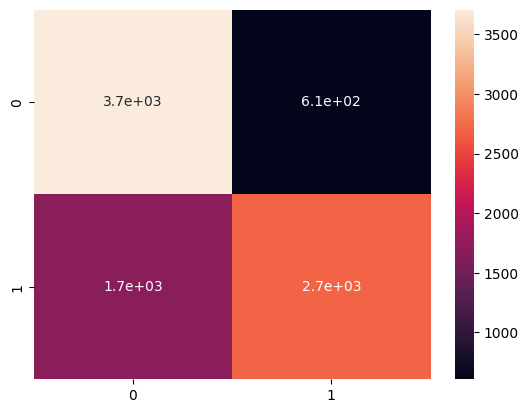

In [ ]:
sns.heatmap(cf_final, annot=True)

In [ ]:
f1_score(y_trans,y_pred_final)

0.702329819081088

In [ ]:
roc_auc_score(y_trans,y_pred_final)

0.7377955298455832

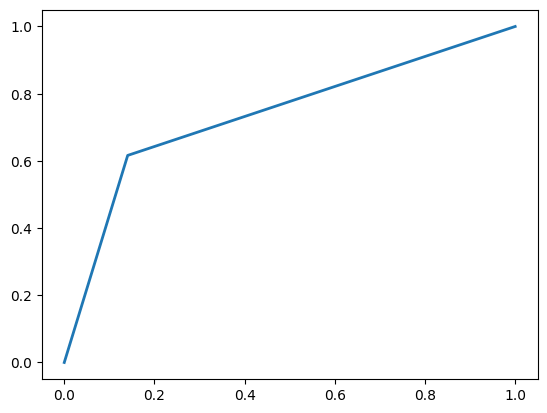

In [ ]:
fpr_final, tpr_final, threshold_final = roc_curve(y_trans,y_pred_final)
plt.plot(fpr_final,tpr_final, linewidth =2)

## polynomial grid

In [ ]:
Grid_params_poly = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    "kernel":["poly"],
    "degree":[2,3],
}

grid_poly = GridSearchCV(SVC(), Grid_params_poly,refit=True, verbose=3, cv=3)

In [ ]:
poly_svm = SVC(kernel="poly", degree=2)
poly_svm.fit(X_trans,y_trans)

d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(degree=2, kernel='poly')

In [ ]:
y_pred_poly = cross_val_predict(poly_svm,X_trans,y_trans, cv=3)

d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Machine Learing\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
cf_poly = confusion_matrix(y_trans,y_pred_poly)
cf_poly

array([[3673,  642],
       [1664, 2714]], dtype=int64)

In [ ]:
cf_svm

array([[3693,  622],
       [1704, 2674]], dtype=int64)

In [ ]:
f1_score(y_trans,y_pred_poly)

0.7018360486164984

<Axes: >

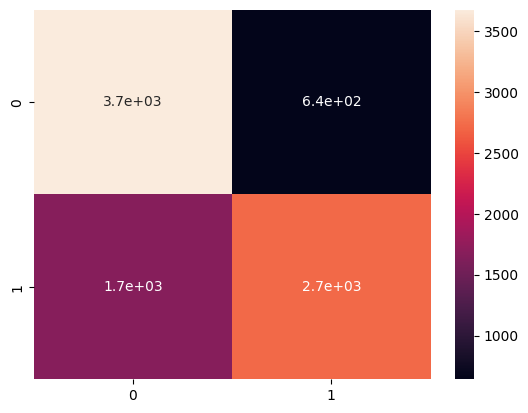

In [ ]:
sns.heatmap(cf_poly, annot=True)

In [ ]:
roc_auc_score(y_trans,y_pred_poly)

0.735567228325341

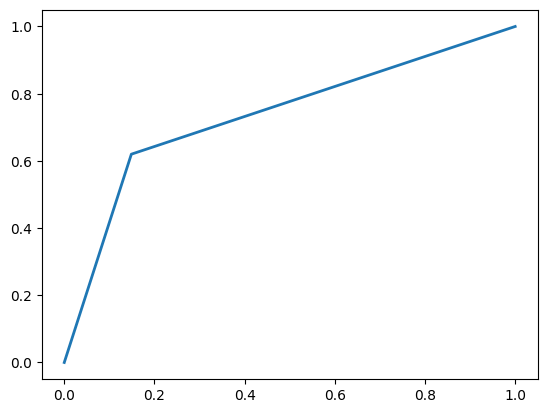

In [ ]:
fpr_poly, tpr_poly, threshold_poly = roc_curve(y_trans,y_pred_poly)
plt.plot(fpr_poly,tpr_poly, linewidth =2)

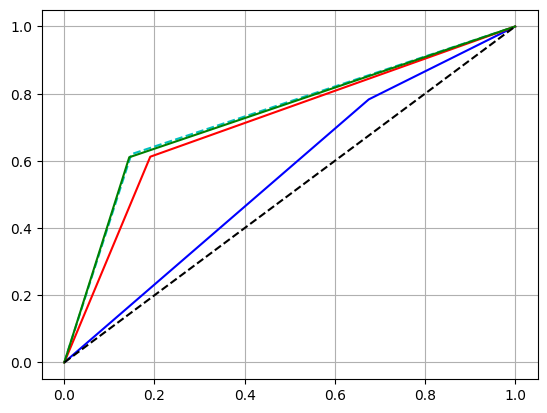

In [ ]:
plt.plot(fpr_poly,tpr_poly, "c--")
plt.plot(fpr_sgd,tpr_sgd, color="blue")
plt.plot(fpr_tree,tpr_tree, color="red")
plt.plot(fpr_svm,tpr_svm, color="green")


plt.plot([0,1],[0,1],"k--")
plt.grid()

### `Final model selected is` {SVC(C=1, gamma=0.1)}

In [ ]:
final_data = pd.read_csv("../Data/test.csv")
final_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [ ]:
X_test = final_data.drop(["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Name", "Cabin"], axis=1)

In [ ]:
X_test

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False
2,0019_01,Europa,True,55 Cancri e,31.0,False
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False
...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.0,False
4273,9269_01,Earth,False,TRAPPIST-1e,42.0,False
4274,9271_01,Mars,True,55 Cancri e,NaN,False
4275,9273_01,Europa,False,NaN,NaN,False


In [ ]:
model = Pipeline([
    ("pipeline", combined_pipeline),
    ("SVM", SVC(C = 1, gamma=0.1))
])

In [ ]:
model.fit(X_train,y_train)

Pipeline(steps=[('pipeline',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoder',
                                                                   OneHotEncoder())]),
                                                  ['HomePlanet', 'CryoSleep',
                                                   'Destination', 'VIP']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age'])])),
                ('SVM', SVC(C=1, gamma=0.1))])

## `Joblib pickle creation`

In [ ]:
import joblib
joblib.dump(model, './model.pkl')

['./model.pkl']

In [ ]:
titanic_model = joblib.load("model.pkl")

In [ ]:
y_pred = titanic_model.predict(X_test)

In [ ]:
y_pred

array([ True, False,  True, ...,  True, False,  True])